# TensorFlow 学习笔记 -CNN网络各层的作用

[toc]
## Flatten 层
 

1.是将多维维数据展平为1维数据 这种转换使得卷积特征图可以作为全连接层的输入，便于进一步进行分类或回归等任务，常用在卷积神经网络中（CNN），尤其在卷积层和池化层到全连接层的过渡阶段

2.Flatten层只是将数据维度展开，不改变数据中特征的顺序或值，确保特征完整传递

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Input

# 输入图像尺寸为 (32, 32, 3)
input_layer = Input(shape=(32, 32, 3))

# 卷积操作
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(input_layer)

# 展平
flatten_layer = Flatten()(conv_layer)




## 输入层  input

输入原始数据，准备输入模型的特征

In [ ]:
#图像输入
Input(shape=(64, 64, 3))  # 输入64x64的彩色图像
#时间序列输入
Input(shape=(100, 1))  # 100个时间步，每步1个特征

## 全连接层 Dense layer
作为分类器

将分布式特征表示映射到样本空间：即将特征图转化为相应的单一标签对应的向量

全连接层一般位于整个卷积神经网络的最后，负责将卷积输出的二维特征图转化成一维的一个向量


In [2]:
# 二分类
dense_binary = Dense(units=1, activation='sigmoid')

# 多分类
dense_multiclass = Dense(units=10, activation='softmax')

## 卷积层 Convolutional layer Conv layer

提取局部特征，例如边缘，纹理，形状

对输入图像进行卷积，卷积结果为输入图像的特征图，利用不同的卷积核（滤波器）来提取图像不同的特征。

卷积网络通过设置卷积核大小与卷积步长来控制每个卷积神经元连接的像素范围，进而达到局部感知的作用。

特点参数共享： 卷积过程中卷积核的权重是不变的，也就是参数共享，通过同一个卷积核提取图片不同位置的相同特征。

使用不同卷积核提取不同特征，从而得到不同的特征图

卷积层相对全连接层，参数量大大减少，提取局部特征

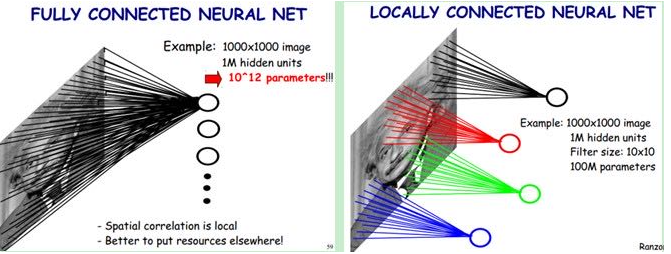





In [ ]:
#图像边缘检测
Conv2D(32, (3, 3), activation='relu', padding='same')  # 提取32个3x3的特征图
#音频信号处理

Conv1D(64, kernel_size=5, activation='relu')  # 一维卷积，用于音频特征提取


## 池化层 Pooling layer

降低特征数分辨率，降低计算量

Max Pooling

Average Pooling

In [3]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

# 最大池化
max_pool = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')

# 平均池化
avg_pool = AveragePooling2D(pool_size=(2, 2), strides=2, padding='same')


## 归一化层 Batch Normalization, BN Layer

归一化：将输入数据 处理后限制在一定范围

网络训练之后，参数会发生变化，BN主要解决在训练过程中，中间层数据分布发生变化的情况。
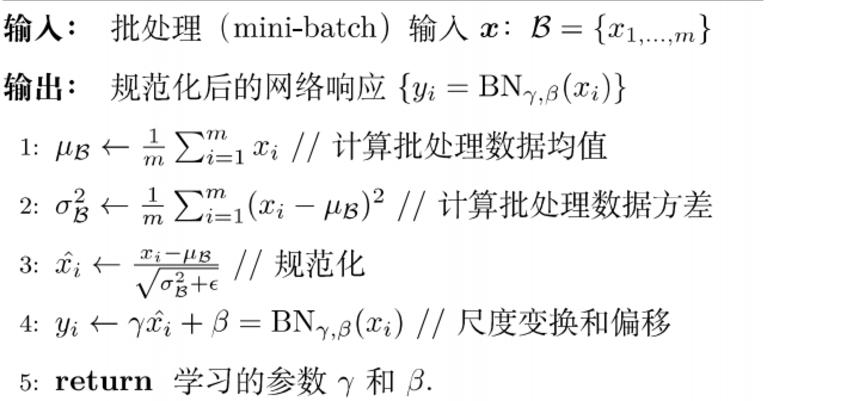

BN 主要步骤：
1.计算每个批次数据均值
2.计算每个训练批次方差
3.使用均值与方差对数据进行归一化
4.尺度变化与偏移，调整数值大小
变化和偏移值由网络学习得到
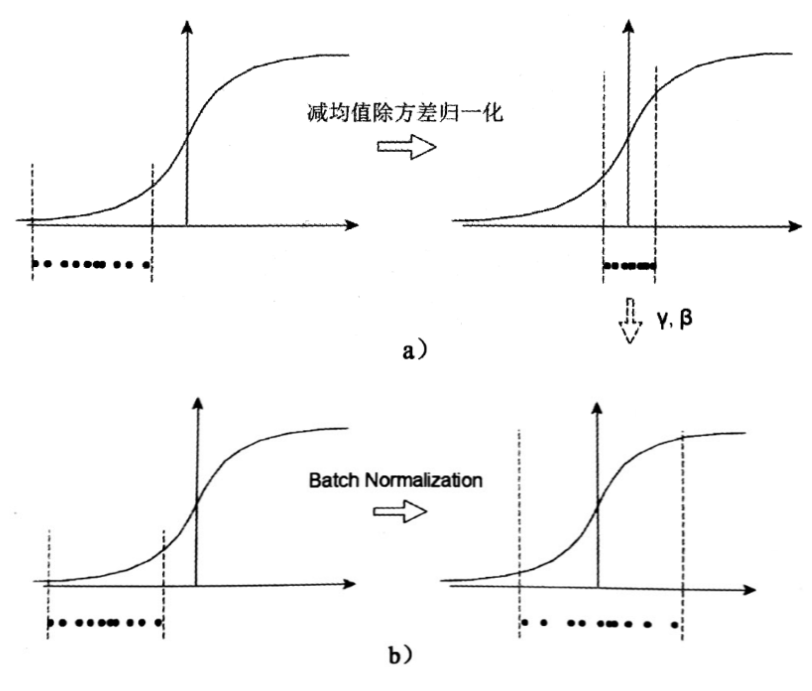
主要作用是使数据始终处在梯度较大的区域，对于绝大多数激活函数，在BN后的区域梯度都是最大或者是有梯度的，一方面对抗梯度消失，另一方面维持较高的学习率，这样使得训练更有效率。

## DropOut 层 

防止过拟合，随机丢弃部分神经元。

In [4]:
from tensorflow.keras.layers import Dropout

# Dropout层
dropout_layer = Dropout(rate=0.5)


## 激活层 Activation layer 

引入非线性，使模型能够学习复杂函数



In [6]:
from tensorflow.keras.layers import Activation

# ReLU激活
relu_activation = Activation('relu')

# Sigmoid激活
sigmoid_activation = Activation('sigmoid')

## 简单的CNN模型

In [5]:
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 多分类输出
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,938,570 (15.02 MB)

 Trainable params: 3,938,570 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

## 参考：

[深度学习：批归一化](https://www.cnblogs.com/skyfsm/p/8453498.html)
[CNN 详解](https://blog.csdn.net/Chenyukuai6625/article/details/77673496)
